In [26]:
import json
import numpy as np
import matplotlib.pyplot as plt

path = "./weak_scalability/"
f = open(f'{path}runtime.json')
data = json.load(f)

length = min(len(data["runtime_ff"]), len(data["runtime_mpi"]))

T_seq = data["T_seq"]
processors = data["processors"][0:length]
runtime_ff = data["runtime_ff"][0:length]
runtime_mpi = data["runtime_mpi"][0:length]

print(T_seq/runtime_ff[1])

1.8301912947047407


In [27]:
def overlap_functions(
        x_data,
        y1_data,
        y2_data,
        x_label,
        y_label,
        f1_label,
        f2_label,
        title
):
    plt.plot(x_data, y1_data, label=f1_label, color='blue', linewidth=2)
    plt.plot(x_data, y2_data, label=f2_label, color='red', linewidth=2)

    overlap = np.abs(np.array(y1_data) - np.array(y2_data)) < 0.1
    plt.fill_between(processors, y1_data, y2_data, where=overlap, color='gray', alpha=0.5)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.axhline(0, color='black',linewidth=1)
    plt.axvline(0, color='black',linewidth=1)
    plt.legend()

    plt.grid(True)
    plt.savefig(path + title.replace(" ", "_"))
    plt.show()
    print(np.around(y1_data, 5))
    print(np.around(y2_data, 5))

### Runtime Plot

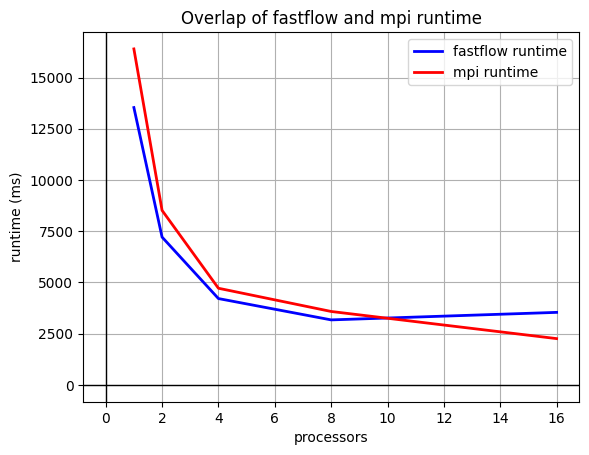

[13534  7214  4214  3173  3540]
[16395  8517  4717  3584  2260]


In [28]:
overlap_functions(
    processors,
    runtime_ff,
    runtime_mpi,
    "processors",
    "runtime (ms)",
    "fastflow runtime",
    "mpi runtime",
    "Overlap of fastflow and mpi runtime"
)

### Speedup plot

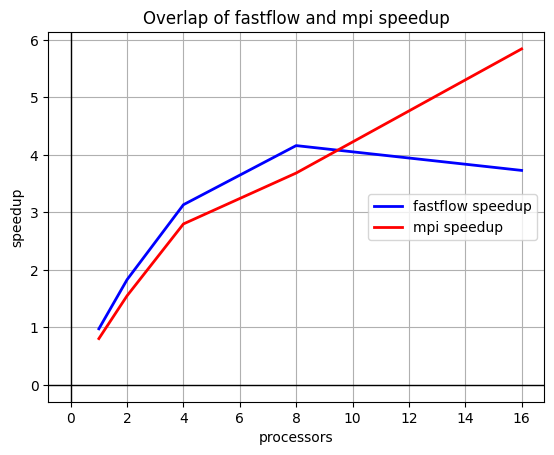

[0.97554 1.83019 3.13313 4.16105 3.72966]
[0.80531 1.55019 2.79902 3.68387 5.84204]


In [29]:
speedup_ff = [T_seq / r for r in runtime_ff]
speedup_mpi = [T_seq / r for r in runtime_mpi]

overlap_functions(
    processors,
    speedup_ff,
    speedup_mpi,
    "processors",
    "speedup",
    "fastflow speedup",
    "mpi speedup",
    "Overlap of fastflow and mpi speedup"
)

### Cost plot

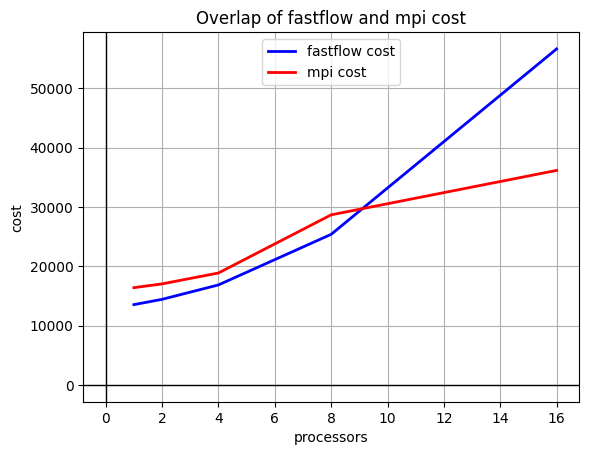

[13534 14428 16856 25384 56640]
[16395 17034 18868 28672 36160]


In [30]:
cost_ff = [r * p for r, p in zip(runtime_ff, processors)]
cost_mpi = [r * p for r, p in zip(runtime_mpi, processors)]

overlap_functions(
    processors,
    cost_ff,
    cost_mpi,
    "processors",
    "cost",
    "fastflow cost",
    "mpi cost",
    "Overlap of fastflow and mpi cost"
)

### Efficency plot

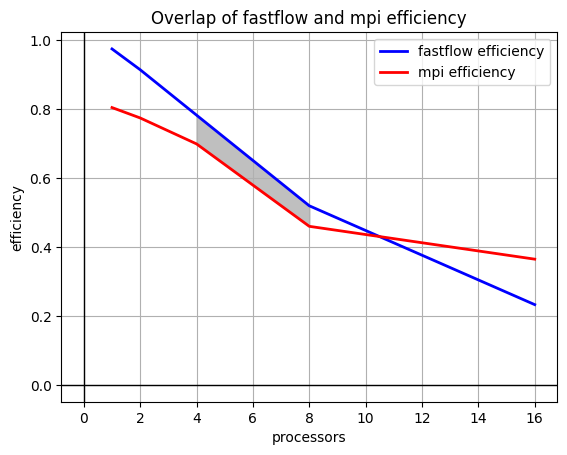

[0.97554 0.9151  0.78328 0.52013 0.2331 ]
[0.80531 0.7751  0.69976 0.46048 0.36513]


In [31]:
efficiency_ff = [s / p for s, p in zip(speedup_ff, processors)]
efficiency_mpi = [s / p for s, p in zip(speedup_mpi, processors)]

overlap_functions(
    processors,
    efficiency_ff,
    efficiency_mpi,
    "processors",
    "efficiency",
    "fastflow efficiency",
    "mpi efficiency",
    "Overlap of fastflow and mpi efficiency"
)
